In [2]:
!pip install rebound

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.3/785.3 kB 8.1 MB/s eta 0:00:00


In [17]:
import rebound
from matplotlib import pyplot as plt
import numpy as np

In [18]:
def pos_jupiter(r,theta):
  x = r*np.cos(theta)
  y = r*np.sin(theta)
  return (x,y)

def pos_particula(r,theta):
  x = r*np.cos((np.pi/3) + theta)
  y = r*np.sin((np.pi/3) + theta)
  return (x,y)

def pos_l5(r,theta):
  x = r*np.cos(theta - (np.pi/3))
  y = r*np.sin(theta - (np.pi/3))
  return(x,y)

In [31]:
masa_jupiter = 1e-3
#masa_jupiter = 1 #cambiamos la masa de jupiter
theta = 0
masa_sol = 1
r_jupiter = 5.2
#r_jupiter = 99 #Variamos el radio de jupiter

r_particula = r_jupiter
r_l5 = r_particula

x_jupiter,y_jupiter = pos_jupiter(r_jupiter,theta)
x_particula,y_particula = pos_particula(r_particula,theta)
x_l5 ,y_l5 = pos_l5(r_l5,theta)

vx_jup,vy_jup = (0,np.sqrt(1/r_jupiter))
#Definimos las componentes de la velocidad angular.
vx_part,vy_part = (-(np.sqrt((masa_jupiter+masa_sol)/r_particula))*np.sin(np.pi/3), (np.sqrt((masa_jupiter+masa_sol)/r_particula))*np.cos(np.pi/3))
vx_l5, vy_l5 = (-(np.sqrt((masa_jupiter+masa_sol)/r_particula))*np.sin(-np.pi/3), (np.sqrt((masa_jupiter+masa_sol)/r_particula))*np.cos(-np.pi/3))

#Aquí variaremos las velocidades por un escalar arbitrario k:
k = 0.5
#vx_part,vy_part = ((k)*-(np.sqrt((masa_jupiter+masa_sol)/r_particula))*np.sin(np.pi/3), (k)*(np.sqrt((masa_jupiter+masa_sol)/r_particula))*np.cos(np.pi/3))
#vx_l5, vy_l5 = ((k)*-(np.sqrt((masa_jupiter+masa_sol)/r_particula))*np.sin(-np.pi/3), (k)*(np.sqrt((masa_jupiter+masa_sol)/r_particula))*np.cos(-np.pi/3))


print(vx_jup,vy_jup)
print(vx_part,vy_part)
print(vx_l5,vy_l5)

0 0.4385290096535146
-0.3799671038392665 0.2193741096848031
0.3799671038392665 0.2193741096848031


In [35]:
sim = rebound.Simulation()
sim.integrator = 'ias15'
sim.add( m = 1)
sim.add(m = masa_jupiter, x = x_jupiter, y = y_jupiter, vx = vx_jup, vy = vy_jup)
sim.add(m=0,x = x_particula, y = y_particula, vx = vx_part, vy = vy_part)
sim.add(m=0,x = x_l5, y = y_l5, vx = vx_l5 , vy = vy_l5)

sim.dt = 0.001  # Paso de tiempo en años
sim.move_to_com()

In [60]:
resolution = 100
x_pos = np.empty((4,resolution))
y_pos = np.empty((4,resolution))
z_pos = np.empty((4,resolution))
times = np.linspace(0,25*2,num = resolution)
for i,t in enumerate(times):
  sim.integrate(t)
  x_pos[1,i] = sim.particles[1].x
  y_pos[1,i] = sim.particles[1].y
  x_pos[2,i] = sim.particles[2].x
  y_pos[2,i] = sim.particles[2].y
  x_pos[3,i] = sim.particles[3].x
  y_pos[3,i] = sim.particles[3].y

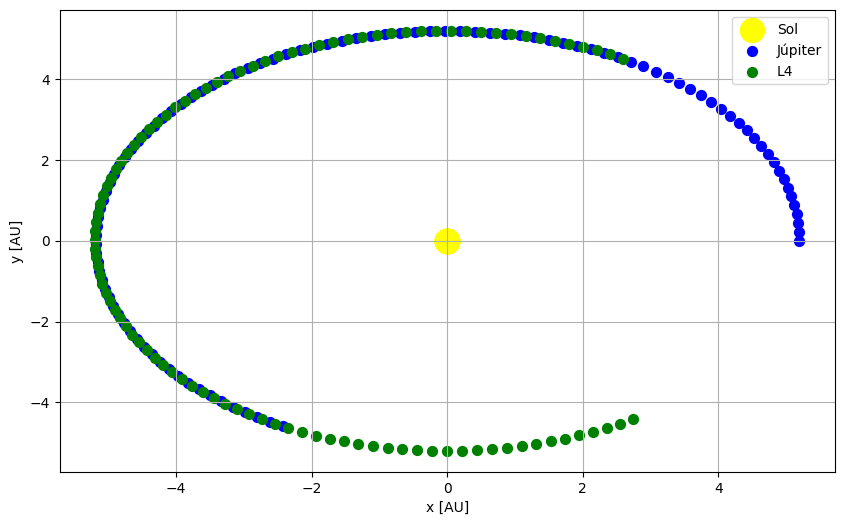

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(x_pos[0], y_pos[0], color='yellow', label='Sol', s=300)
plt.scatter(x_pos[1], y_pos[1], color='blue', label='Júpiter', s=50)
plt.scatter(x_pos[2], y_pos[2], color='green', label='L4', s=50)


plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.legend()
plt.grid(True)

plt.show()

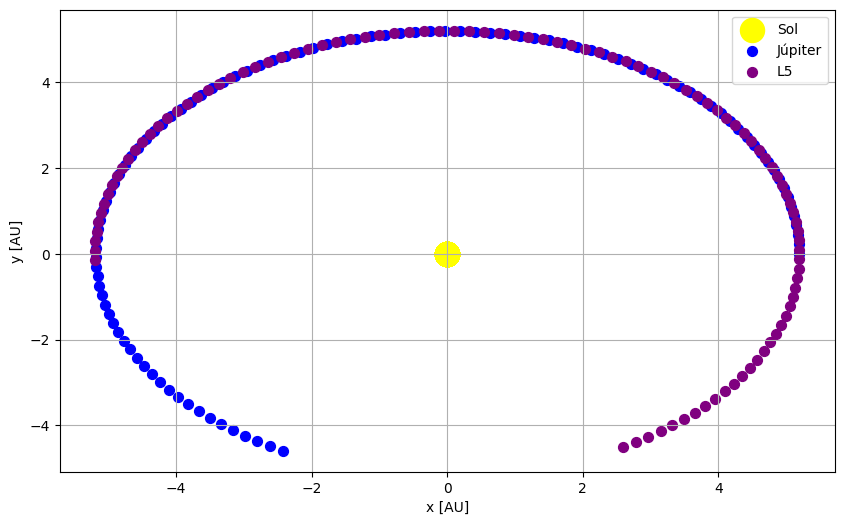

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(x_pos[0], y_pos[0], color='yellow', label='Sol', s=300)
plt.scatter(x_pos[1], y_pos[1], color='blue', label='Júpiter',s=50)
plt.scatter(x_pos[3], y_pos[3], color = "purple", label = "L5",s=50)

plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.legend()
plt.grid(True)

plt.show()